Implementing Simple Chatbot Using Langgraph

In [3]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END



In [4]:
#Reducers
from typing import Annotated
from langgraph.graph.message import add_messages ##add_messages--->Reducer


In [27]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [28]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [29]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_64dfa806c7', 'id': 'chatcmpl-D9L7CIp4qeFCtPRBqqjZbfFtsr155', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c5ee3-726a-70c3-8dd1-35eacfd049d6-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [43]:
from langchain_groq import ChatGroq
llm_groq = ChatGroq(model="qwen/qwen3-32b", reasoning_format="hidden")

In [44]:
llm_groq.invoke("HELLO")

AIMessage(content='Hello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 76, 'prompt_tokens': 10, 'total_tokens': 86, 'completion_time': 0.133158674, 'completion_tokens_details': {'reasoning_tokens': 61}, 'prompt_time': 0.000294443, 'prompt_tokens_details': None, 'queue_time': 0.006274046, 'total_time': 0.133453117}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_78ac7f3229', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c5eea-1365-7010-ba34-91c83ea00ff5-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 10, 'output_tokens': 76, 'total_tokens': 86, 'output_token_details': {'reasoning': 61}})

In [45]:
#Create nodes
def superbot(state:State):
    response = llm_groq.invoke(state['messages'])
    return {"messages": [response]}

In [46]:
graph = StateGraph(State)
graph.add_node("Superbot",superbot)

#Edges
graph.add_edge(START,"Superbot")
graph.add_edge("Superbot",END)


graph_builder = graph.compile()

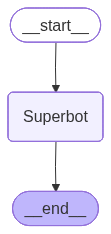

In [47]:
from IPython.display import Image , display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [48]:
#Invocation
graph_builder.invoke({"messages":"Hi my name is Neel and I like to play cricket"})

{'messages': [HumanMessage(content='Hi my name is Neel and I like to play cricket', additional_kwargs={}, response_metadata={}, id='58f74748-fd9b-4266-8894-11ed528dcf8e'),
  AIMessage(content="Hi Neel! That's awesome—you've got a great passion there! 🏏 I'd love to hear more about your cricket journey. Do you play any particular position, or follow any teams closely? Maybe you have a favorite moment from a recent match? Let me know—I'm all ears!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 147, 'prompt_tokens': 20, 'total_tokens': 167, 'completion_time': 0.379617049, 'completion_tokens_details': {'reasoning_tokens': 82}, 'prompt_time': 0.000752702, 'prompt_tokens_details': None, 'queue_time': 0.007139925, 'total_time': 0.380369751}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_78ac7f3229', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c5eea-16d7-7083-a701-fcd582b5c722-0', 

In [49]:
for event in graph_builder.stream({'messages': "My name is neel"},stream_mode="updates"):#By adding stream_mode ="values" we can see the Human Message as well
    print(event)

{'Superbot': {'messages': [AIMessage(content='Hi Neel! Nice to meet you. How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 149, 'prompt_tokens': 13, 'total_tokens': 162, 'completion_time': 0.319223946, 'completion_tokens_details': {'reasoning_tokens': 127}, 'prompt_time': 0.000475929, 'prompt_tokens_details': None, 'queue_time': 0.006844685, 'total_time': 0.319699875}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_78ac7f3229', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c5eea-18ca-7183-ab3e-6325eda64983-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 13, 'output_tokens': 149, 'total_tokens': 162, 'output_token_details': {'reasoning': 127}})]}}


In [1]:
from pydantic import BaseModel


In [5]:
class State(BaseModel):
    messages:Annotated[list,add_messages]

In [6]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="qwen/qwen3-32b" , reasoning_format="hidden")
llm.invoke("Hello model")

AIMessage(content='Hello! I am Qwen3, the latest large language model developed by Alibaba. I am trained to assist with a wide range of tasks, including answering questions, writing stories, emails, scripts, performing logical reasoning, coding, and more. How can I assist you today? Feel free to ask me anything or give me a task!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 223, 'prompt_tokens': 10, 'total_tokens': 233, 'completion_time': 0.485005836, 'completion_tokens_details': {'reasoning_tokens': 151}, 'prompt_time': 0.000213525, 'prompt_tokens_details': None, 'queue_time': 0.037092251, 'total_time': 0.485219361}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_78ac7f3229', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c6437-73b8-7992-8105-6eb7e638f44c-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 10, 'output_tokens': 223, 'total_tokens': 233,

In [12]:
#Node Creation 
def example_node(state: State):
    response = llm.invoke(state.messages) 
    return {"messages": [response]}

In [ ]:
#Builder noder
from langgraph.graph import StateGraph , START , END
builder  = StateGraph(State)
builder.add_node("example_node", example_node)
builder.add_edge(START , "example_node")
builder.add_edge("example_node", END)

graph = builder.compile()

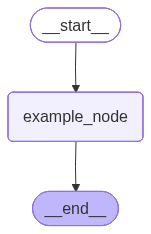

In [14]:
from IPython.display import Image , display
display(Image(graph.get_graph().draw_mermaid_png()))

In [15]:
graph.invoke({"messages":"Hi my name is Neel and I like to play cricket"})

{'messages': [HumanMessage(content='Hi my name is Neel and I like to play cricket', additional_kwargs={}, response_metadata={}, id='cd98422d-36f2-4578-955c-fac529923b21'),
  AIMessage(content="Hi Neel! It's great to meet you. Cricket is an amazing sport—there's so much to love about it! What position do you usually play, or is there a particular aspect of the game you enjoy the most (like batting, bowling, or fielding)? I'd love to hear more about your experience with the sport! 🏏", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 290, 'prompt_tokens': 20, 'total_tokens': 310, 'completion_time': 0.636968256, 'completion_tokens_details': {'reasoning_tokens': 214}, 'prompt_time': 0.001487215, 'prompt_tokens_details': None, 'queue_time': 0.038140333, 'total_time': 0.638455471}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_78ac7f3229', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019